In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler # For data preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.impute import SimpleImputer  # For handling missing values
import matplotlib.pyplot as plt  # For plotting


In [2]:
data='HousingData.csv'
df=pd.read_csv(data)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df.drop_duplicates(inplace=True)


In [5]:
df.dropna

<bound method DataFrame.dropna of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396

In [6]:
# Replace all occurrences of '-' with NaN (Not a Number) in the dataframe
df.replace('-', np.nan, inplace=True)

In [7]:
# Impute missing values in the dataframe using the mean strategy
# handling missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [8]:
# Scale the dataframe to have zero mean and unit variance

scaler = StandardScaler()
scaler.fit(df)
normalized_data = scaler.transform(df)

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR


CRIM         3.528639
ZN          11.211934
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         47.650000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT        9.340000
MEDV         7.975000
dtype: float64

In [10]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
# data_clean = df.loc[(df >= lower_bound) & (df <= upper_bound)]
data_clean = df[(df >= lower_bound) & (df <= upper_bound)]
data_clean


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1.0,296.0,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2.0,242.0,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2.0,242.0,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3.0,222.0,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3.0,222.0,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1.0,273.0,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1.0,273.0,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1.0,273.0,21.0,393.45,6.480000,22.0


In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Apply linear regression




In [13]:
# Splitting the data into training and testing sets
X=df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [14]:
# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 18.87752321223317


In [15]:
# Display y-intercept and slope of the best-fitted line
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 33.634988832069666
Coefficients: [-1.23268721e-01  4.10001063e-02 -1.20207669e-01  3.88952323e+00
 -1.45850020e+01  3.86231179e+00 -2.15704858e-02 -1.49021254e+00
  2.68592239e-01 -8.69350285e-03 -8.85239259e-01  1.02280165e-02
 -4.22936632e-01]


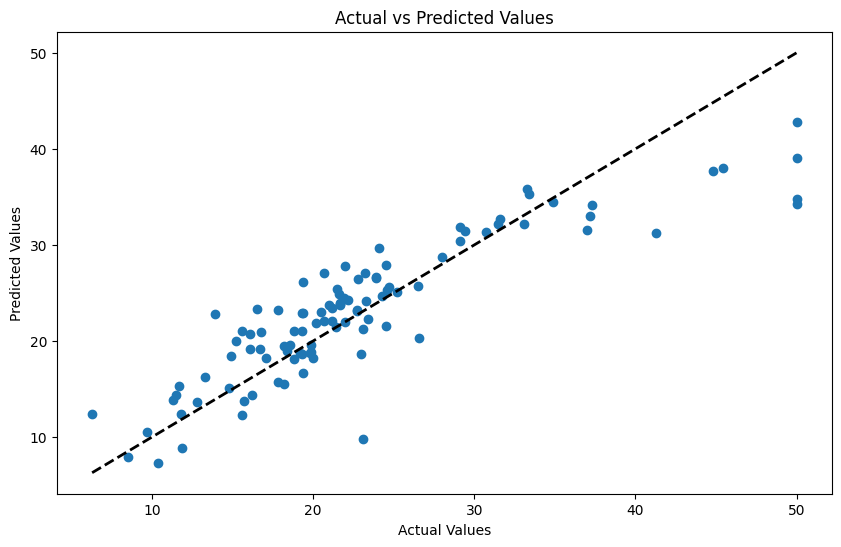

In [16]:
# Step 4: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()